## TITLE: Correlation analysis of political violence and election years in Kenya.

1. INTRODUCTION
    This analysis inquires the relationship between political violence and election years in Kenya. it aims to determine whether elections influence        the oscillation of political violence events and related fatalities.

2. DATA OVERVIEW
   The dataset used for this analysis includes political violence events and fatalities in Kenya starting from 1997 to 2024. The data was sourced from     ACLED and includes the following key variables:
   
   -Events: the count of political violence events each year.
   
   -Fatalities: the number of fatalities due to political violence each year.
   
   -Election year: a binary variable indicating whether a given year was an election year.

import pandas as pd

In [5]:
df = pd.read_excel("C:/Users/user/Desktop/kenya_political_violence.xlsx")

In [6]:
import matplotlib.pyplot as plt

In [57]:
df.head()

,Country,Month_name,Month,Year,Events,Fatalities
0,Kenya,January,1,1997,3,6
1,Kenya,February,2,1997,3,9
2,Kenya,March,3,1997,6,179
3,Kenya,April,4,1997,4,7
4,Kenya,May,5,1997,4,22


In [23]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 
                                        df['Month'].astype(str), format='%Y%m')

In [25]:
df.head()

,Country,Month_name,Month,Year,Events,Fatalities,Date
0,Kenya,January,1,1997,3,6,1997-01-01
1,Kenya,February,2,1997,3,9,1997-02-01
2,Kenya,March,3,1997,6,179,1997-03-01
3,Kenya,April,4,1997,4,7,1997-04-01
4,Kenya,May,5,1997,4,22,1997-05-01


 METHODOLOGY

The analysis used a correlation approach to explore the relationship between election years and political violence events as well as between political years and fatalities. the correlation coefficients were calculated using Pearson correlation method and the political violence trends were plotted for visual representation. key election years were indicated with vertical markers.

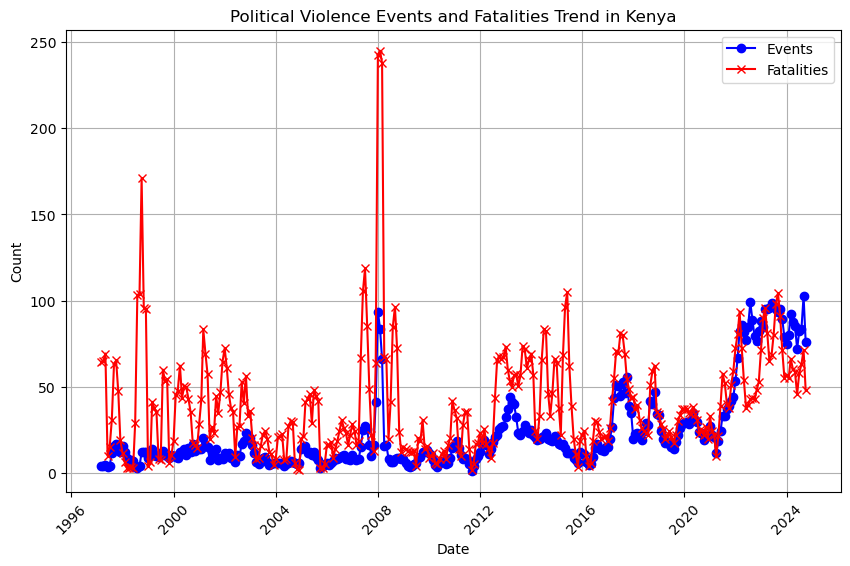

In [71]:

df_agg['Events_new'] = df_agg['Events'].rolling(window=3).mean()
df_agg['Fatalities_new'] = df_agg['Fatalities'].rolling(window=3).mean()

# Plot the data
plt.figure(figsize=(10,6))

# Plot Events
plt.plot(df_agg['date'], df_agg['Events_new'], label='Events', color='blue', marker='o')

# Plot Fatalities
plt.plot(df_agg['date'], df_agg['Fatalities_new'], label='Fatalities', color='red', marker='x')

# Add titles and labels
plt.title('Political Violence Events and Fatalities Trend in Kenya')
plt.xlabel('Date')
plt.ylabel('Count')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


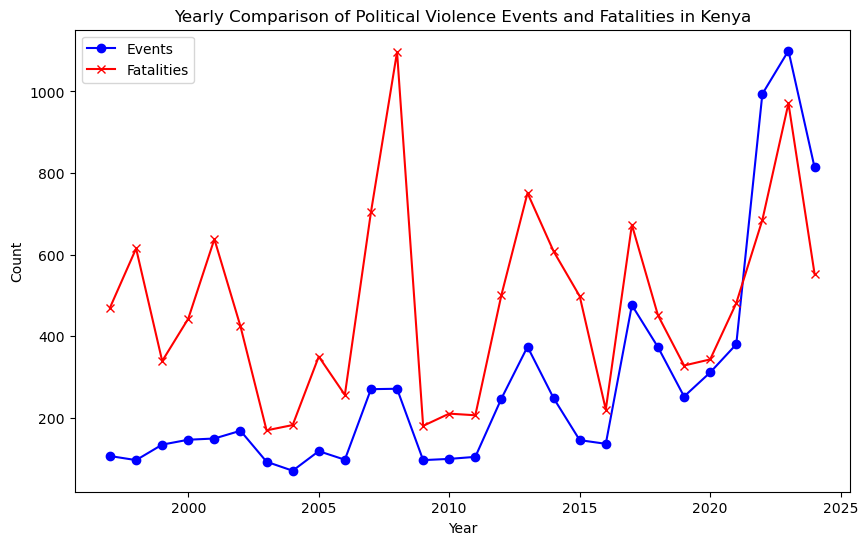

In [42]:
# Group by 'Year' and aggregate the sum of 'Events' and 'Fatalities'
yearly_data = df.groupby('Year').agg({'Events': 'sum', 'Fatalities': 'sum'}).reset_index()

# Plotting yearly comparison of Events and Fatalities
plt.figure(figsize=(10, 6))

# Line plot for Events
plt.plot(yearly_data['Year'], yearly_data['Events'], label='Events', marker='o', color='blue')

# Line plot for Fatalities
plt.plot(yearly_data['Year'], yearly_data['Fatalities'], label='Fatalities', marker='x', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Comparison of Political Violence Events and Fatalities in Kenya')
plt.legend()

# Display the plot
plt.show()


VISUALISATION

-As shown in the visual representation, there are spikes in political violence events and fatalities during certain election years, 
such as 2007 and 2008. However, these spikes are not consistent across all election years. 
This further reinforces the conclusion that elections alone do not fully explain the trends in political violence and fatalities.

# List of Kenyan election years
election_years = [1992, 1997, 2002, 2007, 2013, 2017, 2022]

# a new column showing whether a year is an election year
df['Election Year'] = df['Year'].apply(lambda x: 1 if x in election_years else 0)


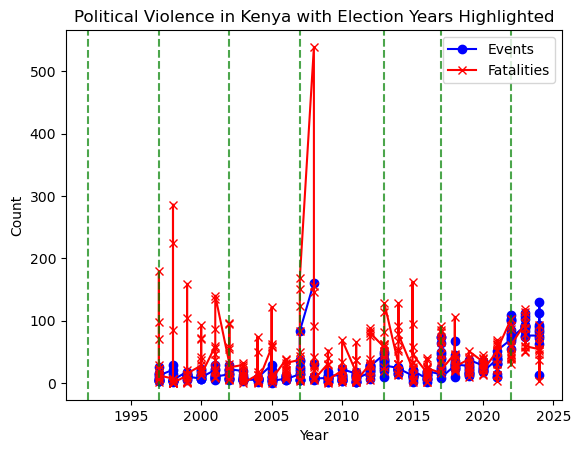

In [65]:
# events and fatalities plot
plt.plot(df['Year'], df['Events'], label='Events', color='blue', marker='o')
plt.plot(df['Year'], df['Fatalities'], label='Fatalities', color='red', marker='x')

# election years
for year in election_years:
    plt.axvline(x=year, color='green', linestyle='--', alpha=0.7)

plt.title('Political Violence in Kenya with Election Years Highlighted')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


In [67]:
# Correlation between election years and political violence events
correlation_events = df['Election Year'].corr(df['Events'])

# Correlation between election years and fatalities
correlation_fatalities = df['Election Year'].corr(df['Fatalities'])

print("Correlation between election years and events: ", correlation_events)
print("Correlation between election years and fatalities: ", correlation_fatalities)


Correlation between election years and events:  0.1917783152905872
Correlation between election years and fatalities:  0.12665401070374002


RESULTS

1. Correlation Between Election Years And Political Violence Events:
   
-The correlation coefficients between election years and number of political violence events was 0.19. This highlights a weak positive correlation, suggesting a slight increase in the number of violence events during election years. however the relationship is not that strong, showing that while there may be a trend of increased political violence during election years, other factors likely play a more significant role.

2. Correlation Between Election Years and Fatalities:
   
-The correlation coefficient between election years and fatalities was 0.13, indicating an even weaker relationship. There might be a slight tendency for fatalities to increase in election years, but the correlation is very weak, implying that election years alone are not a major driver of fatalities in political violence incidents.
 

DISCUSSION:


The weak correlations indicate that while elections may be associated with a slight increase in political violence and fatalities, other factors such as High cost of living , political instability, and ethnic tensions likely contribute to the occurrences of violence during certain yeras like 2024. Further research could investigate these additional variables to provide a more comprehensive understanding of the drivers of political violence.


CONCLUSION

In conclusion, the analysis reveals a weak positive correlation between election years and political violence events, as well as between election years and fatalities. These findings suggest that while elections are associated with slightly higher levels of political violence, they are not the sole drivers, and further exploration of other contributing factors is recommended.

RECOMMENDATION FOR FUTURE RESEARCH:

-Consider adding more variables for deeper analysis, such as political party involvement, regional data, or economic conditions.